# Computational Techniques for Differential Equations  
**Master in Applied and Computational Mathematics**  
**Academic Year 2025/2026**  

Francisco Javier Miró Rodríguez

Enrique Zafra

---

## Lab 1

We consider the following boundary value problem:  

$$
u''(x) = \tfrac{1}{2} e^{2x}, \quad x \in (0,1), \quad u'(0) = 2, \quad u(1) = 3.
$$

The exact solution is given by  

$$
u(x) = \tfrac{1}{8} e^{2x} + \tfrac{7}{4}x + \tfrac{1}{8}(10 - e^2).
$$

---

## Exercises

1. **Second-order finite differences (FD):**  
   Implement a second-order FD scheme using the ghost point approach to solve the boundary value problem. Verify numerically that the method achieves second-order accuracy.  

2. **Extrapolation method:**  
   Apply the extrapolation technique using the second-order FD scheme developed in Exercise 1. Show that the method attains fourth-order accuracy.  

3. **Deferred correction method:**  
   Use the second-order FD scheme to construct a deferred correction approach. Demonstrate that the resulting solution achieves fourth-order accuracy.  

4. **Fourth-order finite differences:**  
   Implement a direct fourth-order FD scheme for the boundary value problem. Verify that the method achieves the expected fourth-order accuracy.  


Exercise 1

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution and RHS
u_exact = lambda x: 1/8*np.exp(2*x) + 7/4*x + 1/8*(10-np.exp(2))
f = lambda x: np.exp(2*x)/2
d2f = lambda x: np.exp(2*x)*2

# Domain and boundary data
a, b = 0.0, 1.0
sigma = 2.0
beta = 3.0

In [4]:
def solve(a, b, f, m):
    h = (b - a) / (m + 1)
    x_bc = np.linspace(a, b, m + 2)
    x = x_bc[:-1]


    d0 = np.ones(m+1)
    d1 = np.ones(m)
    A = (-2 * np.diag(d0) + np.diag(d1, 1) + np.diag(d1, -1)) / h**2

    rhs = np.zeros(m+1)
    rhs = f(x)
    rhs[0] += 2*sigma/h
    rhs[-1]-= beta/h**2

    A[0,0] = -2/h**2
    A[0,1] =  2/h**2


    U_interior = np.linalg.solve(A, rhs)

    U = np.zeros(m + 2)
    U[-1] = beta
    U[:-1] = U_interior
    return x_bc, U

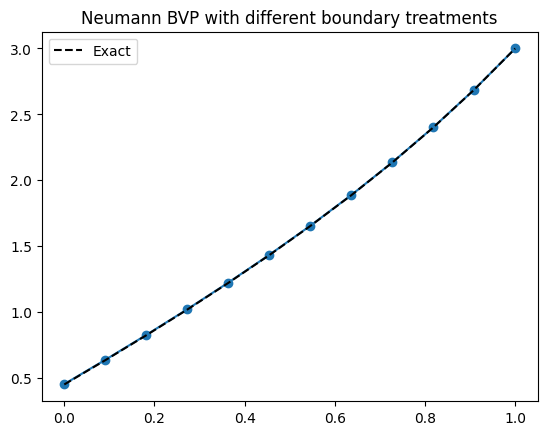

In [5]:
import numpy as np
import matplotlib.pyplot as plt

m = 10

x_bc, U = solve(a, b, f, m)
plt.plot(x_bc, U, 'o-')
plt.plot(x_bc, u_exact(x_bc), 'k--', label="Exact")
plt.legend()
plt.title("Neumann BVP with different boundary treatments")
plt.show()

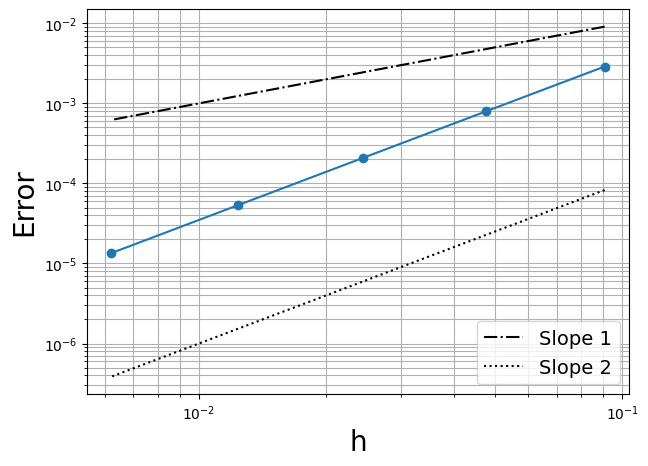

     m         h     error     ratio
0   10  0.090909  0.002885       NaN
1   20  0.047619  0.000792  1.998441
2   40  0.024390  0.000208  1.999580
3   80  0.012346  0.000053  1.999891
4  160  0.006211  0.000013  1.999972


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Functions
m_values = [10, 20, 40, 80, 160]

h_vec = []
error = []

for m in m_values:
  x_bc, U = solve(a, b, f, m)
  h = (b - a) / (m + 1)
  h_vec.append(h)
  error.append(np.max(np.abs(U - u_exact(x_bc))))


h_vec= np.array(h_vec)
error = np.array(error)


# Convergence plots with slope reference lines
plt.figure(figsize=(7, 5))
plt.loglog(h_vec, error, 'o-')


plt.loglog(h_vec, 0.1*h_vec**1, 'k-.', label="Slope 1")
plt.loglog(h_vec, 0.01*h_vec**2, 'k:', label="Slope 2")

plt.xlabel("h", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.legend(fontsize=14, loc="lower right")
plt.grid(True, which="both")
plt.show()


# Ratios of convergence
ratio= np.concatenate([[np.nan], np.log2(error[1:] / error[:-1])/np.log2(h_vec[1:] / h_vec[:-1])]) #nan pq no tiene con quien comparar y el -np.log2 para que sea positivo el ratio


# Tables
T = pd.DataFrame({"m":m_values,"h": h_vec, "error": error, "ratio": ratio})


print(T)

Exercise 2

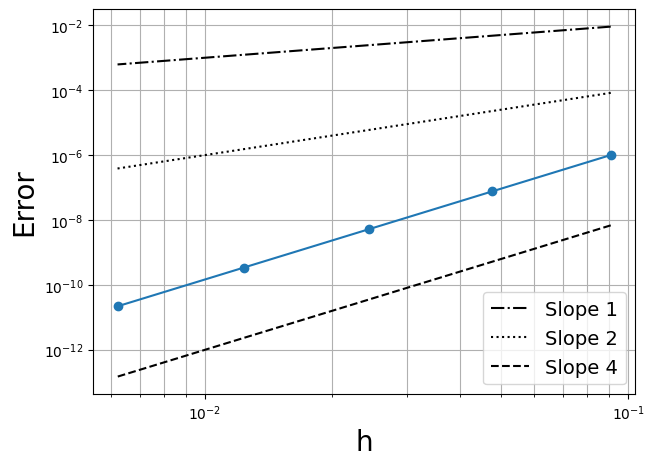

     m         h         error     ratio
0   10  0.090909  1.002408e-06       NaN
1   20  0.047619  7.555011e-08  3.998230
2   40  0.024390  5.201344e-09  3.999523
3   80  0.012346  3.414681e-10  3.999867
4  160  0.006211  2.187961e-11  3.999823


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Functions
m_values = [10, 20, 40, 80, 160]

h_vec = []
error = []

for m in m_values:
  x_bc, U = solve(a, b, f, m)
  v_bc,V = solve(a, b, f, 2*m+1)
  ufinal= (4*V[::2]-U)/3
  h = (b - a) / (m + 1)
  h_vec.append(h)
  error.append(np.max(np.abs(ufinal - u_exact(x_bc))))


h_vec= np.array(h_vec)
error = np.array(error)


# Convergence plots with slope reference lines
plt.figure(figsize=(7, 5))
plt.loglog(h_vec, error, 'o-')


plt.loglog(h_vec, 0.1*h_vec**1, 'k-.', label="Slope 1")
plt.loglog(h_vec, 0.01*h_vec**2, 'k:', label="Slope 2")
plt.loglog(h_vec, 0.0001*h_vec**4, 'k--', label="Slope 4")

plt.xlabel("h", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.legend(fontsize=14, loc="lower right")
plt.grid(True, which="both")
plt.show()


# Ratios of convergence
ratio= np.concatenate([[np.nan], np.log2(error[1:] / error[:-1])/np.log2(h_vec[1:] / h_vec[:-1])]) #nan pq no tiene con quien comparar y el -np.log2 para que sea positivo el ratio


# Tables
T = pd.DataFrame({"m":m_values,"h": h_vec, "error": error, "ratio": ratio})


print(T)

Exercise 3

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def solve2(a, b, f, d2f, m):
  N = m+2
  x_bc = np.linspace(a, b, N)
  x = x_bc[0:-1]
  h = (b-a)/(m+1)

  A = np.zeros((N, N))
  np.fill_diagonal(A, -2/(h**2))
  np.fill_diagonal(A[:,1:], 1/h**2)
  np.fill_diagonal(A[1:,:], 1/h**2)
  A[0] = np.zeros(N)
  A[-1] = np.zeros(N)

  A[-1,-1] = 1

  F = np.zeros(N)

  F[-1] = beta

  firstRow = np.zeros(N+1)
  firstRow[0] = -1/(2*h)
  firstRow[2] = 1/(2*h)
  A = np.hstack([np.zeros((N, 1)), A])
  A = np.vstack([firstRow, A])

  A[1][0]=1/h**2
  A[1][1]=-2/h**2
  A[1][2]=1/h**2

  F[0:-1] = f(x) + (h**2)/12 * d2f(x)
  F = np.hstack([sigma, F])
  F[0] = sigma + (h**2)/12 * d2f(a)

  U = np.linalg.solve(A, F)

  U = np.delete(U, 0)
  return x_bc, U

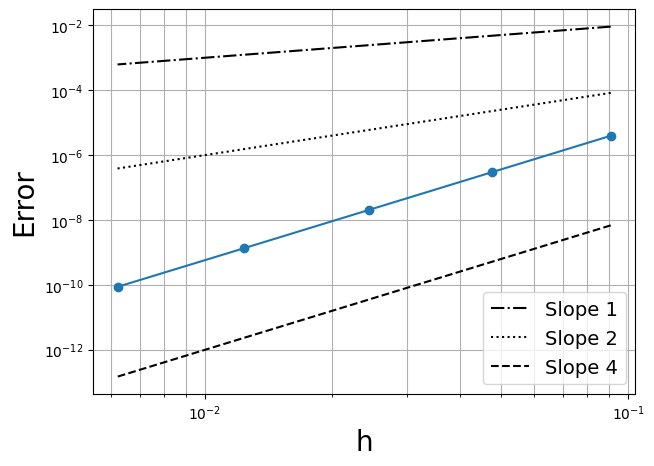

     m         h         error     ratio
0   10  0.090909  3.936161e-06       NaN
1   20  0.047619  2.966506e-07  3.998295
2   40  0.024390  2.042305e-08  3.999540
3   80  0.012346  1.340861e-09  3.999771
4  160  0.006211  8.707068e-11  3.980386


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Functions
m_values = [10, 20, 40, 80, 160]

h_vec = []
error = []

for m in m_values:
  x_bc, U = solve2(a, b, f, d2f, m)
  h = (b - a) / (m + 1)
  h_vec.append(h)
  error.append(np.max(np.abs(U - u_exact(x_bc))))


h_vec= np.array(h_vec)
error = np.array(error)


# Convergence plots with slope reference lines
plt.figure(figsize=(7, 5))
plt.loglog(h_vec, error, 'o-')


plt.loglog(h_vec, 0.1*h_vec**1, 'k-.', label="Slope 1")
plt.loglog(h_vec, 0.01*h_vec**2, 'k:', label="Slope 2")
plt.loglog(h_vec, 0.0001*h_vec**4, 'k--', label="Slope 4")

plt.xlabel("h", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.legend(fontsize=14, loc="lower right")
plt.grid(True, which="both")
plt.show()


# Ratios of convergence
ratio= np.concatenate([[np.nan], np.log2(error[1:] / error[:-1])/np.log2(h_vec[1:] / h_vec[:-1])]) #nan pq no tiene con quien comparar y el -np.log2 para que sea positivo el ratio


# Tables
T = pd.DataFrame({"m":m_values,"h": h_vec, "error": error, "ratio": ratio})


print(T)

Exercise 4

In [17]:
def solve_bvp_4(a, b, f, m):
    x_bc = np.linspace(a, b, m+2)
    x = x_bc[1:-1]
    h = (b-a)/(m+1)

    # Step 2: build matrix A (m x m) for finite differences
    A = (
        np.diagflat([-30] * (m+2), k=0)
        + np.diagflat([16] * (m+2), k=-1)[:-1, :-1]
        + np.diagflat([16] * (m+2), k=1)[:-1, :-1]
        + np.diagflat([-1] * (m+2), k=-2)[:-2, :-2]
        + np.diagflat([-1] * (m+2), k=2)[:-2, :-2]
    ) / 12 / h**2

    A[0,0] = -25/12 / h**1
    A[0, 1] = 4 / h**1
    A[0, 2] = -3 / h**1
    A[0, 3] = 4/3 / h**1
    A[0, 4] = -1/4 / h**1

    A[1,0] = 10/12 / h**2
    A[1,1] = -15/12 / h**2
    A[1,2] = -4/12 / h**2
    A[1,3] = 14/12 / h**2
    A[1,4] = -6/12 / h**2
    A[1,5] = 1/12 / h**2

    A[-2, -6] = 1/12 / h**2
    A[-2, -5] = -6/12 / h**2
    A[-2, -4] = 14/12 / h**2
    A[-2, -3] = -4/12 / h**2
    A[-2, -2] = -15/12 / h**2
    A[-2, -1] = 10/12 / h**2

    # Step 3: build RHS vector b_vec = f(x)
    F = f(x_bc)

    # Step 4: enforce u(a)=alpha (Dirichlet)
    F[-1] = beta
    A[-1, -1]  = 1
    A[-1, -2]  = 0
    A[-1, -3]  = 0
    A[-1, -4]  = 0
    A[-1, -5]  = 0

    # Step 5: enforce u'(b)=sigma depending on `method`
    F[0] = sigma

    # Step 6: solve system, reconstruct full solution
    U = np.linalg.solve(A, F)

    return x_bc, U

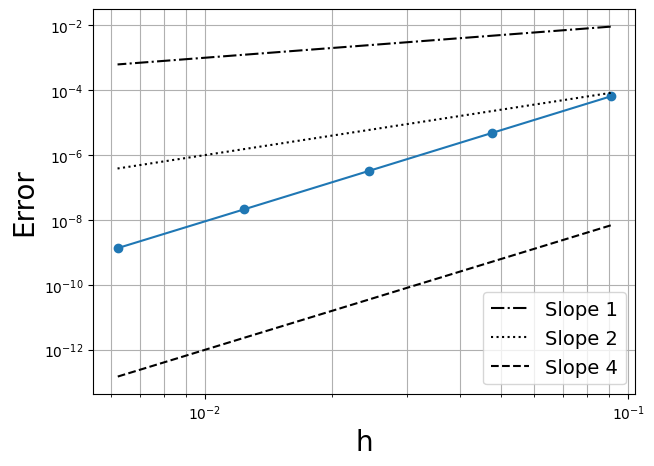

     m         h         error     ratio
0   10  0.090909  6.451522e-05       NaN
1   20  0.047619  4.795670e-06  4.019608
2   40  0.024390  3.251811e-07  4.022252
3   80  0.012346  2.112507e-08  4.015294
4  160  0.006211  1.353135e-09  4.000315


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Functions
m_values = [10, 20, 40, 80, 160]

h_vec = []
error = []

for m in m_values:
  x_bc, U = solve_bvp_4(a, b, f, m)
  h = (b - a) / (m + 1)
  h_vec.append(h)
  error.append(np.max(np.abs(U - u_exact(x_bc))))


h_vec= np.array(h_vec)
error = np.array(error)


# Convergence plots with slope reference lines
plt.figure(figsize=(7, 5))
plt.loglog(h_vec, error, 'o-')


plt.loglog(h_vec, 0.1*h_vec**1, 'k-.', label="Slope 1")
plt.loglog(h_vec, 0.01*h_vec**2, 'k:', label="Slope 2")
plt.loglog(h_vec, 0.0001*h_vec**4, 'k--', label="Slope 4")

plt.xlabel("h", fontsize=20)
plt.ylabel("Error", fontsize=20)
plt.legend(fontsize=14, loc="lower right")
plt.grid(True, which="both")
plt.show()


# Ratios of convergence
ratio= np.concatenate([[np.nan], np.log2(error[1:] / error[:-1])/np.log2(h_vec[1:] / h_vec[:-1])]) #nan pq no tiene con quien comparar y el -np.log2 para que sea positivo el ratio


# Tables
T = pd.DataFrame({"m":m_values,"h": h_vec, "error": error, "ratio": ratio})


print(T)